In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "OutputData/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

## Perform API Calls
##### Perform a weather check on each city using a series of successive API calls.
##### Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"----------------------------------------------------------")
print(f"Beginning Data Retrieval")
print(f"----------------------------------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

----------------------------------------------------------
Beginning Data Retrieval
----------------------------------------------------------
Processing Record 1 | Coolum Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=coolum beach
Processing Record 2 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=jamestown
Processing Record 3 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=busselton
Processing Record 4 | Lexington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=lexington
Processing Record 5 | Paraty
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=parati
Processing Record 6 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1d

Processing Record 56 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=kavieng
Processing Record 57 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=port alfred
Processing Record 58 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=cape town
Processing Record 59 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=fortuna
Processing Record 60 | Jiuquan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=jiuquan
Processing Record 61 | Hastings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=hastings
City not found. Skipping...
Processing Record 62 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff0

Processing Record 112 | Vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=vila
Processing Record 113 | Burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=burnie
Processing Record 114 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=torbay
Processing Record 115 | Maneromango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=maneromango
Processing Record 116 | Mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=mahajanga
Processing Record 117 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=wanning
Processing Record 118 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=lebu
Pro

Processing Record 167 | Terney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=terney
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 168 | Laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=laguna
Processing Record 169 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=taoudenni
Processing Record 170 | Toora-Khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=toora-khem
City not found. Skipping...
Processing Record 171 | Basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=basco
Processing Record 172 | Nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=nioro
Processing Record 173 | Wick
htt

Processing Record 223 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=margate
Processing Record 224 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=nome
Processing Record 225 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=cabo san lucas
Processing Record 226 | Leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=leh
Processing Record 227 | Mahébourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=mahebourg
Processing Record 228 | Kosonsoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=kosonsoy
Processing Record 229 | High Level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&

Processing Record 279 | Lüderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=luderitz
Processing Record 280 | Mollendo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=mollendo
Processing Record 281 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=petropavlovsk-kamchatskiy
Processing Record 282 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=eureka
Processing Record 283 | Bodden Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=bodden town
Processing Record 284 | Alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=alekseyevsk
Processing Record 285 | Parabel'
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 334 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=dunedin
Processing Record 335 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=iqaluit
Processing Record 336 | Trincomalee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=trincomalee
Processing Record 337 | Lima Duarte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=lima duarte
Processing Record 338 | Angoche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=angoche
Processing Record 339 | Puksoozero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=puksoozero
City not found. Skipping...
Processing Record 340 | Chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 389 | Teknāf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=teknaf
Processing Record 390 | Zvishavane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=zvishavane
Processing Record 391 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=lorengau
Processing Record 392 | Zhangjiakou Shi Xuanhua Qu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=xuanhua
Processing Record 393 | Rosetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=rosetta
Processing Record 394 | Kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=kaeo
City not found. Skipping...
Processing Record 395 | Gizo Government Station
http://api.openweathermap.org/data/2.5/weather?

Processing Record 445 | Mirebalais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=mirebalais
Processing Record 446 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=flinders
Processing Record 447 | Wairoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=wairoa
Processing Record 448 | Sanguéya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=sangueya
Processing Record 449 | Vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=vilyuysk
Processing Record 450 | Nanyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=nanyang
Processing Record 451 | Matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&

Processing Record 501 | Brigantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=brigantine
Processing Record 502 | Itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=itoman
Processing Record 503 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=karratha
Processing Record 504 | Liberal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=liberal
Processing Record 505 | Mankono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=mankono
Processing Record 506 | Bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1db2&q=bereda
Processing Record 507 | Paso de Carrasco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514bff03b058e553c98b7ba1ccae1

## Convert Raw Data to DataFrame
##### Export the city data into a .csv.
##### Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_df = pd.DataFrame(weatherpy_dict)

# Display count of weather data values to look for any missing data...looks like we're good! 
weather_df.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [6]:
# Save data frame to CSV
weather_df.to_csv('OutputData/weather_data.csv')

# Display data frame head 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Coolum Beach,100,AU,1591740018,97,-26.53,153.10,63.00,1.99
1,Jamestown,1,US,1591740272,45,42.10,-79.24,88.00,2.21
2,Busselton,87,AU,1591740273,68,-33.65,115.33,46.99,7.83
3,Lexington,40,US,1591740274,69,37.99,-84.48,82.99,13.87
4,Paraty,20,BR,1591740032,73,-23.22,-44.71,71.60,3.36


## Inspect the data and remove the cities where the humidity > 100%.
##### Skip this step if there are no cities that have humidity > 100%.

In [7]:
#  Get the indices of cities that have humidity over 100%.
#First sort descending by Humidty
humidity_df = weather_df.sort_values(["Humidity"], ascending=False)
humidity_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
346,Kuching,40,MY,1591740502,100,1.55,110.33,75.20,2.24
271,Kingaroy,90,AU,1591740573,100,-26.53,151.83,55.99,5.82
294,Can Tho,40,VN,1591740599,100,10.03,105.78,78.80,3.36
201,Sydney,75,AU,1591740494,100,-33.87,151.21,57.99,5.82
10,Loei,100,TH,1591740282,100,17.42,101.50,65.48,3.42


#### It looks like there are no cities with a humidity over 100...so we can skip the next step!

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = weather_df

clean_city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Coolum Beach,100,AU,1591740018,97,-26.53,153.10,63.00,1.99
1,Jamestown,1,US,1591740272,45,42.10,-79.24,88.00,2.21
2,Busselton,87,AU,1591740273,68,-33.65,115.33,46.99,7.83
3,Lexington,40,US,1591740274,69,37.99,-84.48,82.99,13.87
4,Paraty,20,BR,1591740032,73,-23.22,-44.71,71.60,3.36


In [9]:
# Extract relevant fields from the data frame
clean_city_df = clean_city_df[["City", "Country", "Cloudiness", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]


# Export the City_Data into a csv
clean_city_df.to_csv("OutputData/CleanCityData.csv", index=True, header=True)

## Plotting the Data
##### Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
##### Save the plotted figures as .pngs.

## Latitude vs. Temperature

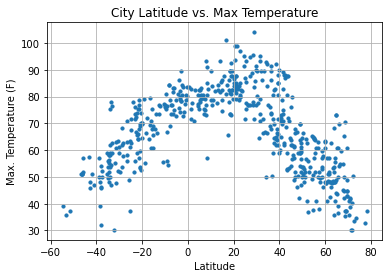

In [10]:
# Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("OutputData/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

##### This code is analyzing the relationship between the Latitude and the Max Temperature. It appears to show that max temperature peaks around 20 degrees Latitude and then goes down the farther you get from there.

## Latitude vs. Humidity

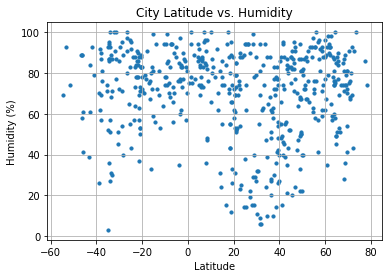

In [11]:
# Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("OutputData/Humidity_vs_Latitude.png")

# Show plot
plt.show()

##### This code is analyzing the relationship between the Latitude and the Humidity. It appears to show that there is no correlation between the two.

## Latitude vs. Cloudiness

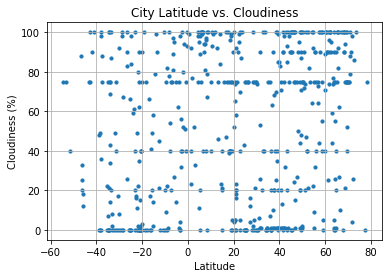

In [12]:
# Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("OutputData/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

##### This code is analyzing the relationship between the Latitude and the Cloudiness. It appears to show that there is no correlation between the two.

## Latitude vs. Windspeed

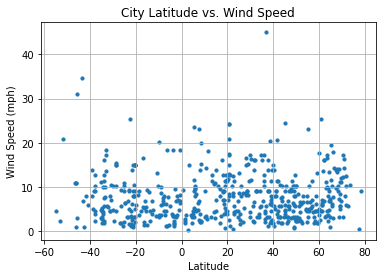

In [13]:

# Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("OutputData/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

##### This code is analyzing the relationship between the Latitude and the Max Temperature. It appears to show that there is no correlation between the two.

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = clean_city_df.loc[clean_city_df["Lat"] >= 0]
southern_df = clean_city_df.loc[clean_city_df["Lat"] < 0]

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.78


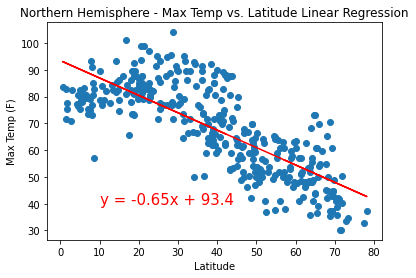

In [16]:

# Call an function #1
equation = linear_regression(northern_df["Lat"], northern_df["Max Temp"])

# Call an function #2
annotate(equation, 10, 40)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("OutputData/Max_Temp_vs_Latitude_Northern_Regression.png")

##### This code is analyzing the relationship between the Latitude and the Max Temperature in the Norther Hemisphere. It appears to show that max temperature peaks around 20 degrees Latitude and then goes down the farther you get from there. The higher negative r value shows that there is a decent amount of correlation between the Latitude and the Max Temperature. The higher the Latitude, the lower the Max Temperature in general.

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.79


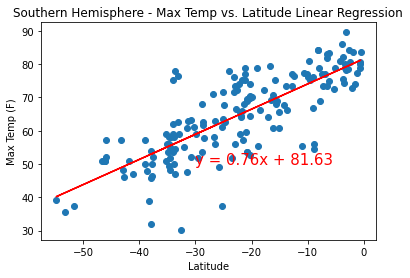

In [17]:
# Call an function #1
equation = linear_regression(southern_df["Lat"],southern_df["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("OutputData/Max_Temp_vs_Latitude_Southern_Regression.png")

##### This code is analyzing the relationship between the Latitude and the Max Temperature in the Southern Hemisphere. It appears to show that max temperature peaks the closer to Latitude 0 degrees. The higher r value shows that there is a decent amount of correlation between the Latitude and the Max Temperature. The closer to 0 the Latitude gets, the higher the Max Temperature in general.

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.06


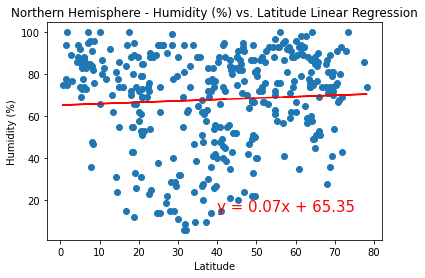

In [18]:
# Call an function #1
equation = linear_regression(northern_df["Lat"], northern_df["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("OutputData/Humidity_vs_Latitude_Northern_Regression.png")

##### This code is analyzing the relationship between the Latitude and the Humidity in the Northern Hemisphere. The low correlation shown suggests that there is no correlation between the Latitude and the Humidity.

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.12


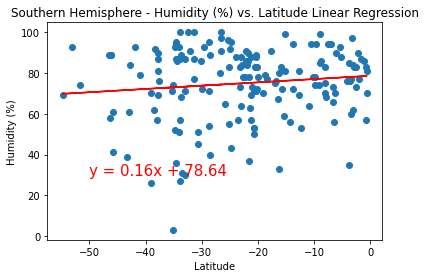

In [19]:
# Call an function #1
equation = linear_regression(southern_df["Lat"], southern_df["Humidity"])

# Call an function #2
annotate(equation, -50, 30)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("OutputData/Humidity_vs_Latitude_Southern_Regression.png")

##### This code is analyzing the relationship between the Latitude and the Humidity in the Southern Hemisphere. The low correlation shown suggests that there is no correlation between the Latitude and the Humidity.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.08


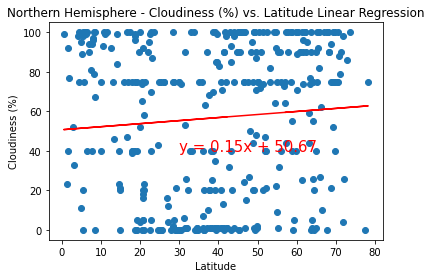

In [20]:
# Call an function #1
equation = linear_regression(northern_df["Lat"], northern_df["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("OutputData/Cloudiness_vs_Latitude_Northern_Regression.png")

##### This code is analyzing the relationship between the Latitude and the Cloudiness in the Northern Hemisphere. The low correlation shown suggests that there is no correlation between the Latitude and the Cloudiness.

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.04


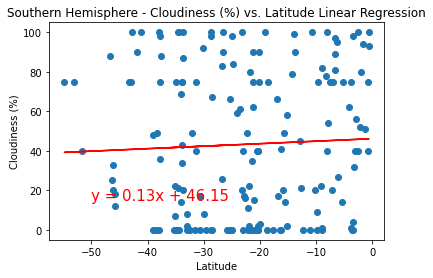

In [21]:
# Call an function #1
equation = linear_regression(southern_df["Lat"], southern_df["Cloudiness"])

# Call an function #2
annotate(equation, -50, 15)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("OutputData/Cloudiness_vs_Latitude_Southern_Regression.png")

##### This code is analyzing the relationship between the Latitude and the Cloudiness in the Southern Hemisphere. The low correlation shown suggests that there is no correlation between the Latitude and the Cloudiness.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.01


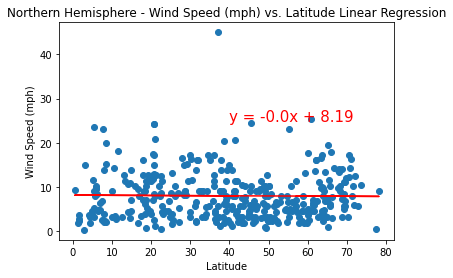

In [22]:
# Call an function #1
equation = linear_regression(northern_df["Lat"], northern_df["Wind Speed"])

# Call an function #2
annotate(equation, 40, 25)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("OutputData/Wind_Speed_vs_Latitude_Northern_Regression.png")

##### This code is analyzing the relationship between the Latitude and the Wind Speed in the Northern Hemisphere. The low correlation shown suggests that there is no correlation between the Latitude and the Windspeed.

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.18


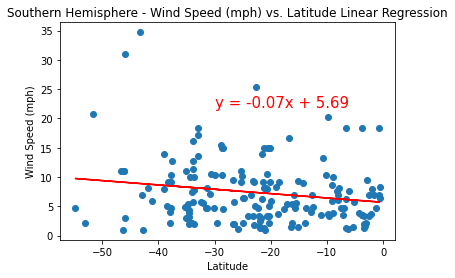

In [23]:
# Call an function #1
equation = linear_regression(southern_df["Lat"], southern_df["Wind Speed"])

# Call an function #2
annotate(equation, -30, 22)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("OutputData/Wind_Speed_vs_Latitude_Southern_Regression.png")

##### This code is analyzing the relationship between the Latitude and the Wind Speed in the Southern Hemisphere. The low correlation shown suggests that there is no correlation between the Latitude and the Windspeed.